![CampusX - Sequential Workflows in LangGraph Agentic AI using LangGraph Video 5 CampusX [bAWujyAl1Kk - 1536x864 - 27m15s].png](<attachment:CampusX - Sequential Workflows in LangGraph Agentic AI using LangGraph Video 5 CampusX [bAWujyAl1Kk - 1536x864 - 27m15s].png>)
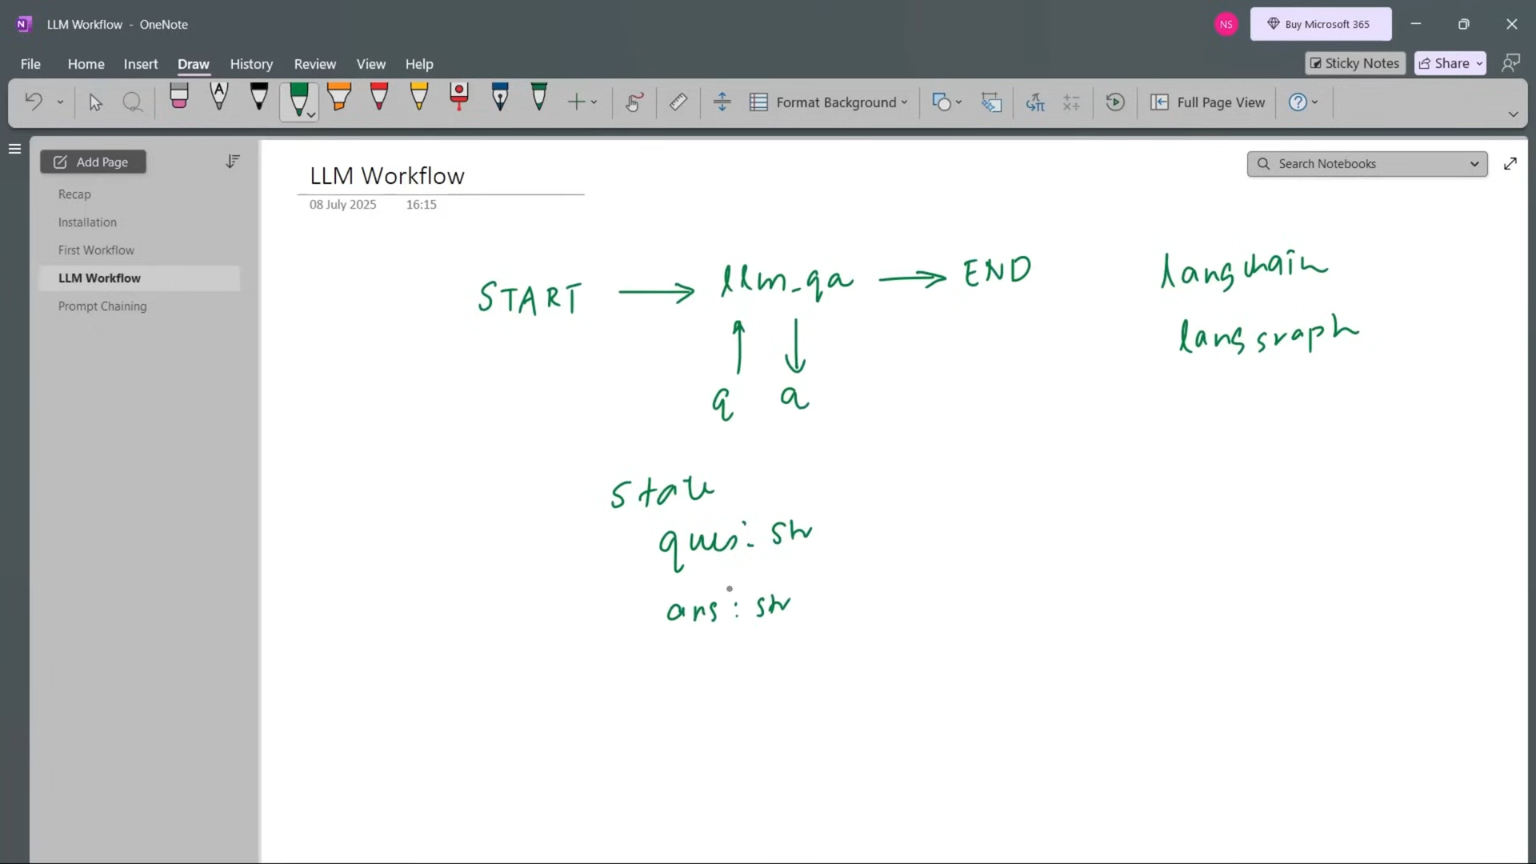

# <b>Workflow that we will create

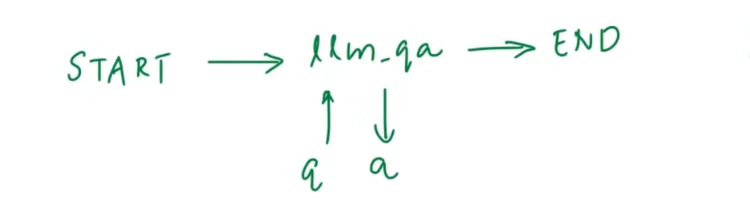

#### step by step

step1:-importing libraries

In [1]:
from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI

model = ChatGoogleGenerativeAI(model="gemini-2.5-pro")

In [2]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

step2:-creating state

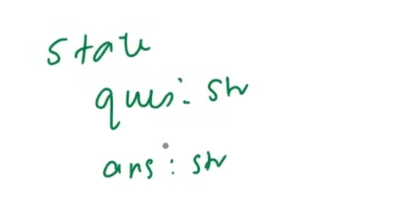

In [4]:
# craete a state
class LLMState(TypedDict):
    question: str
    answer: str

step3:-initializing the graph

In [6]:
graph=StateGraph(LLMState)

step4:-adding nodes to your graph

In [8]:
# function for quering and answering
def llm_qa(state: LLMState) -> LLMState:

    # extract the question from state
    question = state['question']

    # form a prompt
    prompt = f'Answer the following question {question}'

    # ask that question to the LLM
    answer = model.invoke(prompt).content

    # update the answer in the state
    state['answer'] = answer

    return state

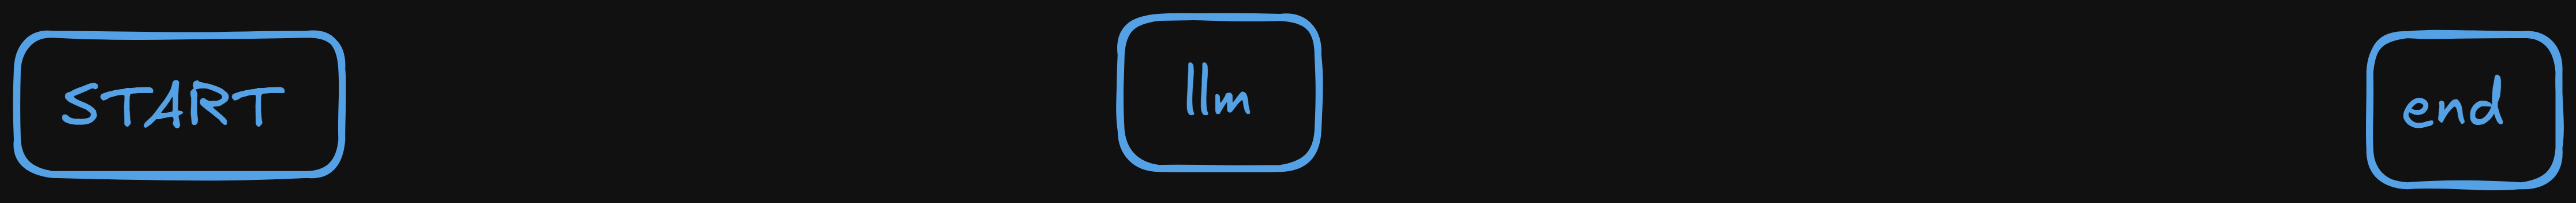

In [9]:
# add nodes
graph.add_node('llm_qa', llm_qa)

step5:-adding edges

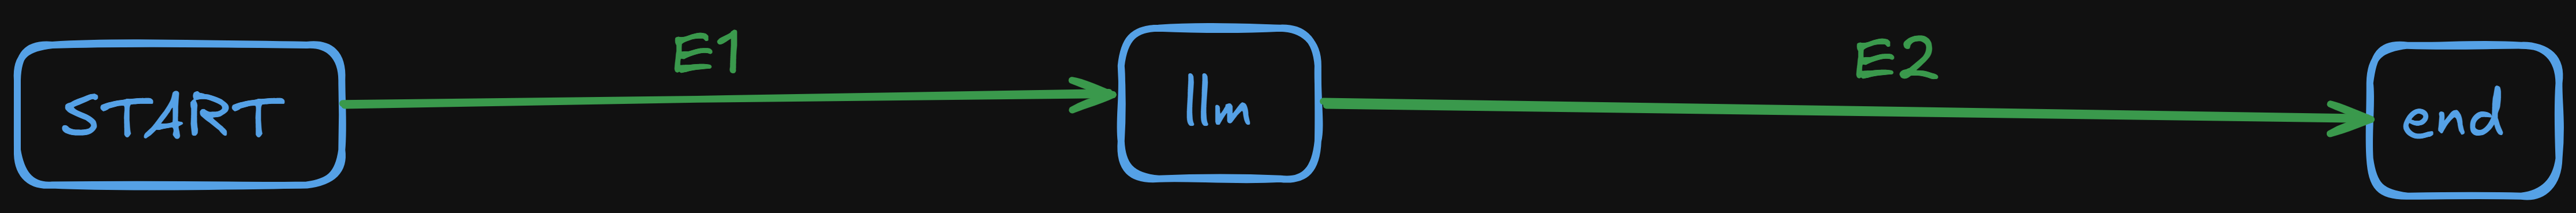

In [10]:
# add edges
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

step6:-compiling the graph

In [11]:
# compile
workflow = graph.compile()

step7:-executing the graph

In [12]:
intial_state = {
    'question': 'How far is moon from the earth?'
    }


In [ ]:

final_state = workflow.invoke(intial_state)
final_state


{'question': 'How far is moon from the earth?',
 'answer': ['Of course! Here is a detailed answer to that question, broken down from a simple answer to more interesting details.\n\n### The Simple Answer\n\nThe **average distance** from the Earth to the Moon is about **238,855 miles** (or **384,400 kilometers**).\n\n---\n\n### The Detailed Answer\n\nThe Moon\'s distance from Earth is not constant because its orbit is not a perfect circle—it\'s an ellipse (an oval shape). This means the distance changes throughout the month.\n\n*   **Perigee (Closest Point):** When the Moon is at its closest point to Earth, it is about **225,700 miles** (363,300 km) away. A full moon at perigee is often called a **"Supermoon"** because it can appear slightly larger and brighter in the sky.\n*   **Apogee (Farthest Point):** When the Moon is at its farthest point from Earth, it is about **252,000 miles** (405,500 km) away. A full moon at apogee is sometimes called a **"Micromoon."**\n\n| Point in Orbit | D